In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))


Using TensorFlow backend.


In [2]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 3, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/Users\HP\Videos\Ineuron\DL2\CNNFamily\Images',
                                                 target_size = (64, 64),
                                                 batch_size = 32)

test_set = test_datagen.flow_from_directory('/Users\HP\Videos\Ineuron\DL2\CNNFamily\Images',
                                            target_size = (64, 64),
                                            batch_size = 32)



Found 39 images belonging to 3 classes.
Found 39 images belonging to 3 classes.


In [5]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 2000,
                         epochs = 5,
                         validation_data = test_set,    
                         validation_steps = 1000)

Epoch 1/5
2000/2000 [==============================] - 1814s 907ms/step - loss: 0.0030 - accuracy: 0.9988 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
2000/2000 [==============================] - 1824s 912ms/step - loss: 5.4079e-08 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
2000/2000 [==============================] - 1821s 911ms/step - loss: 9.3555e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
2000/2000 [==============================] - 1824s 912ms/step - loss: 3.9917e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
2000/2000 [==============================] - 1309s 655ms/step - loss: 1.3631e-09 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


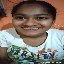

In [61]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/Users/HP\Pictures/diksha.jpeg', target_size = (64, 64))
test_image

In [62]:
test_image = image.img_to_array(test_image)
test_image

array([[[ 65.,  56.,  57.],
        [102.,  98.,  97.],
        [ 99.,  61.,  50.],
        ...,
        [149.,  89.,  61.],
        [145.,  88.,  58.],
        [145.,  88.,  61.]],

       [[ 65.,  60.,  57.],
        [ 99.,  98.,  96.],
        [103.,  65.,  52.],
        ...,
        [151.,  91.,  63.],
        [150.,  89.,  60.],
        [146.,  89.,  62.]],

       [[ 80.,  72.,  70.],
        [ 76.,  72.,  69.],
        [116., 105.,  99.],
        ...,
        [156.,  95.,  66.],
        [153.,  93.,  65.],
        [151.,  91.,  63.]],

       ...,

       [[ 33.,  22.,  20.],
        [ 33.,  22.,  20.],
        [ 32.,  21.,  19.],
        ...,
        [ 41.,  49.,  51.],
        [ 39.,  47.,  49.],
        [ 27.,  35.,  37.]],

       [[ 35.,  21.,  20.],
        [ 35.,  21.,  20.],
        [ 33.,  22.,  20.],
        ...,
        [ 46.,  52.,  50.],
        [ 41.,  45.,  46.],
        [ 25.,  29.,  30.]],

       [[ 33.,  22.,  20.],
        [ 33.,  22.,  20.],
        [ 32.,  

In [63]:
test_image = np.expand_dims(test_image, axis = 0)
test_image

array([[[[ 65.,  56.,  57.],
         [102.,  98.,  97.],
         [ 99.,  61.,  50.],
         ...,
         [149.,  89.,  61.],
         [145.,  88.,  58.],
         [145.,  88.,  61.]],

        [[ 65.,  60.,  57.],
         [ 99.,  98.,  96.],
         [103.,  65.,  52.],
         ...,
         [151.,  91.,  63.],
         [150.,  89.,  60.],
         [146.,  89.,  62.]],

        [[ 80.,  72.,  70.],
         [ 76.,  72.,  69.],
         [116., 105.,  99.],
         ...,
         [156.,  95.,  66.],
         [153.,  93.,  65.],
         [151.,  91.,  63.]],

        ...,

        [[ 33.,  22.,  20.],
         [ 33.,  22.,  20.],
         [ 32.,  21.,  19.],
         ...,
         [ 41.,  49.,  51.],
         [ 39.,  47.,  49.],
         [ 27.,  35.,  37.]],

        [[ 35.,  21.,  20.],
         [ 35.,  21.,  20.],
         [ 33.,  22.,  20.],
         ...,
         [ 46.,  52.,  50.],
         [ 41.,  45.,  46.],
         [ 25.,  29.,  30.]],

        [[ 33.,  22.,  20.],
       

In [64]:
result = classifier.predict(test_image)
result

array([[0., 1., 0.]], dtype=float32)

In [65]:
training_set.class_indices


{'Charul': 0, 'Diksha': 1, 'Mummy': 2}

In [66]:
i=result
if i[0][0]==1:
    prediction = 'This is Charul Kumawat'
    print(prediction)
elif i[0][1]==1:
    prediction = 'DIKSHA SHINDE'
    print(prediction)
else:
    prediction = 'KAVITA SHINDE'
    print(prediction)

DIKSHA SHINDE


In [67]:
classifier.save("CNN-FAMILY.h5")